# MCMC analysis notebook
## using the vanilla MontePython analysis tools
(there si another notebook using getdist, getdist_mcmc.ipynb, which should be preferred. this notebook was used for simplicity, and is now legacy)

In [1]:
import subprocess
from pathlib import Path

base = Path("/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/9_axions/")

chains = [
        "planck_TTTEEElensing_pantheon_plus_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_desi_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_boss_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_sh0es_boss_2025-12-19",
         ]

for chain in chains:
    cmd = [
        "python",
        "/Users/bellamarco01/uni/1_master_thesis/montepython/montepython_public/montepython/MontePython.py",
        "info",
        str(base/chain)
    ]
    print("Running:", " ".join(cmd))
    subprocess.run(cmd, check=True)


Running: python /Users/bellamarco01/uni/1_master_thesis/montepython/montepython_public/montepython/MontePython.py info /Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19
 /!\ PyMultiNest detected but MultiNest likely not installed correctly. You can
     safely ignore this if not running with option -m NS
Running Monte Python v3.6.1

--> Scanning file /Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/9_axions/planck_TTTEEElensing_pantheon_plus_2025-12-19/2025-12-19_1000000__2.txt: Removed 0 non-markovian points, 92 points of burn-in, keep 423 steps
                                                                                                                                              2025-12-19_1000000__3.txt: Removed 0 non-markovian points, 8 points of burn-in, keep 502 steps
                                                                                                                    

Displaying planck_TTTEEElensing_pantheon_plus_2025-12-19_1d.pdf


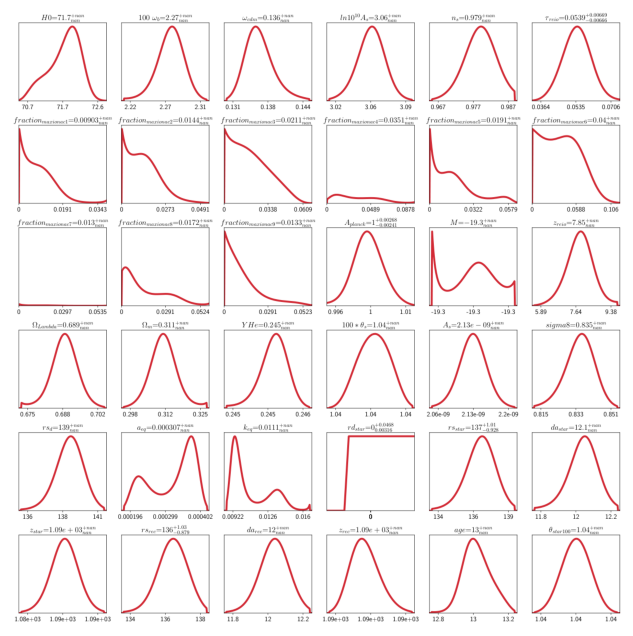

Displaying planck_TTTEEElensing_pantheon_plus_2025-12-19_triangle.pdf


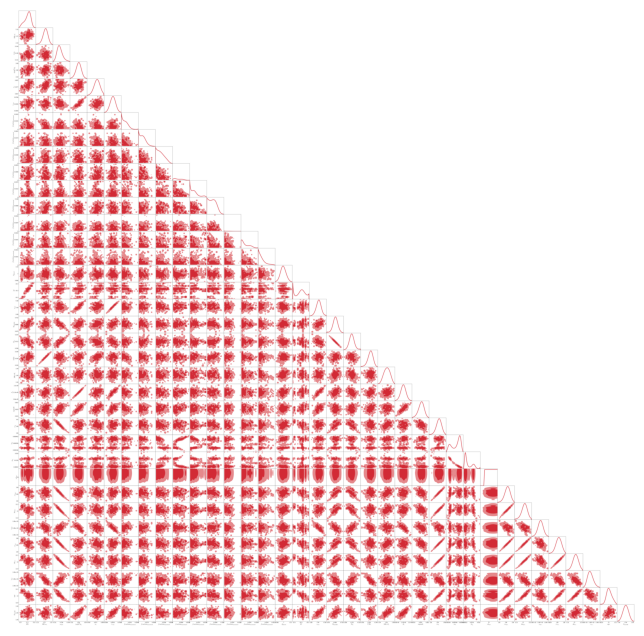

Displaying planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19_triangle.pdf


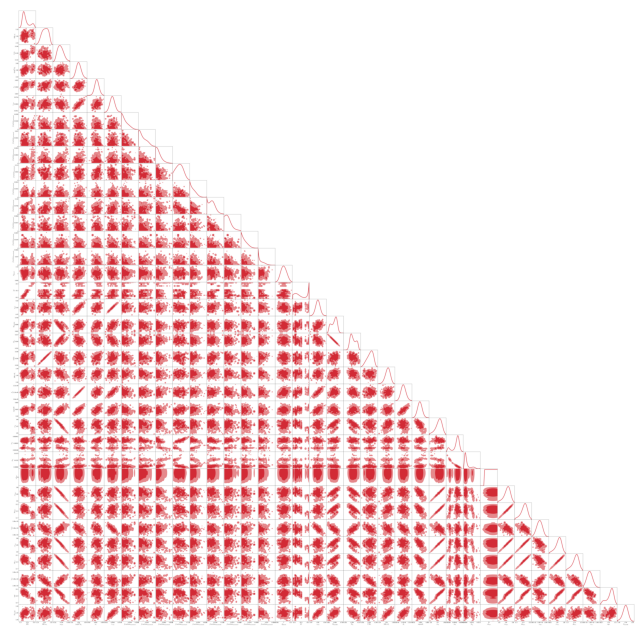

Displaying planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19_1d.pdf


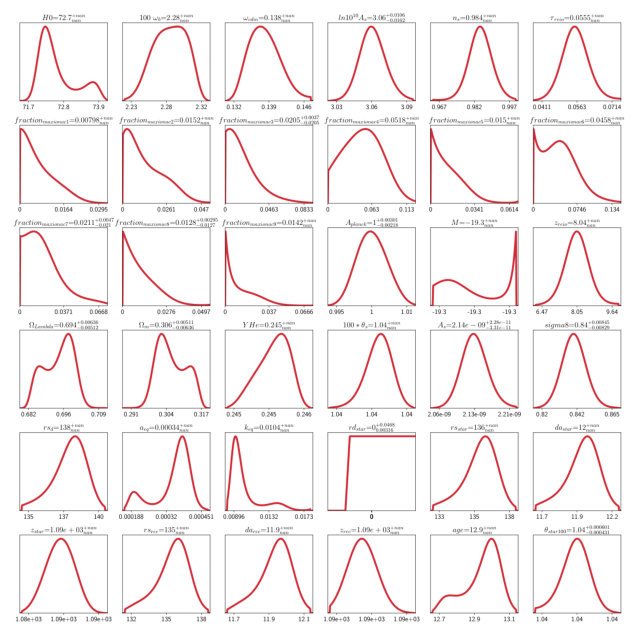

Displaying planck_TTTEEElensing_pantheon_plus_desi_2025-12-19_1d.pdf


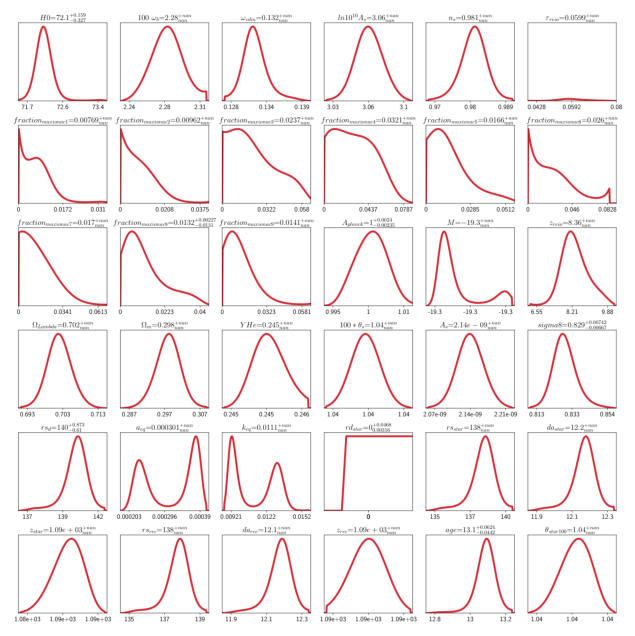

Displaying planck_TTTEEElensing_pantheon_plus_desi_2025-12-19_triangle.pdf


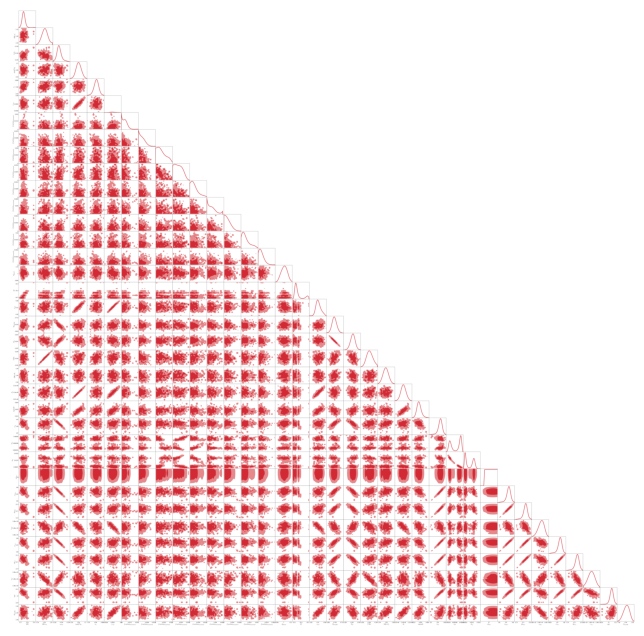

Displaying planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-19_triangle.pdf


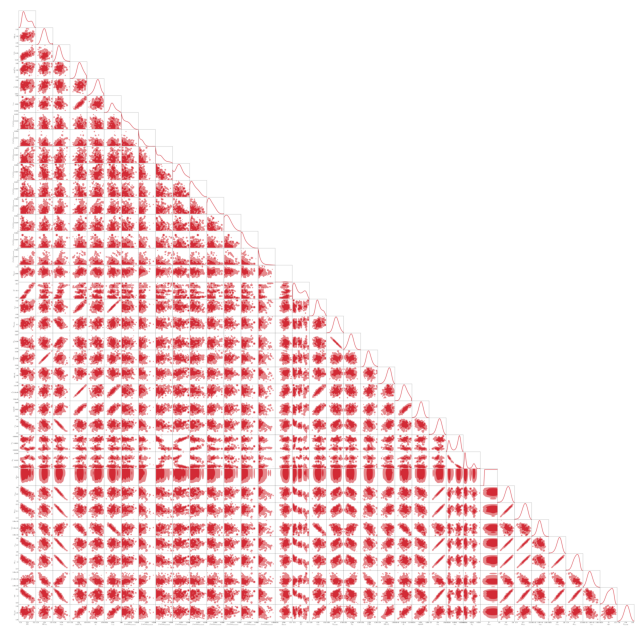

Displaying planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-19_1d.pdf


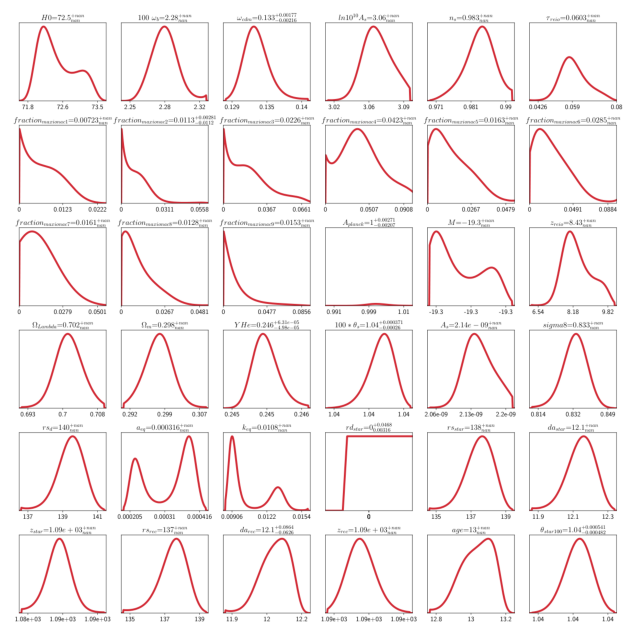

Displaying planck_TTTEEElensing_pantheon_plus_boss_2025-12-19_triangle.pdf


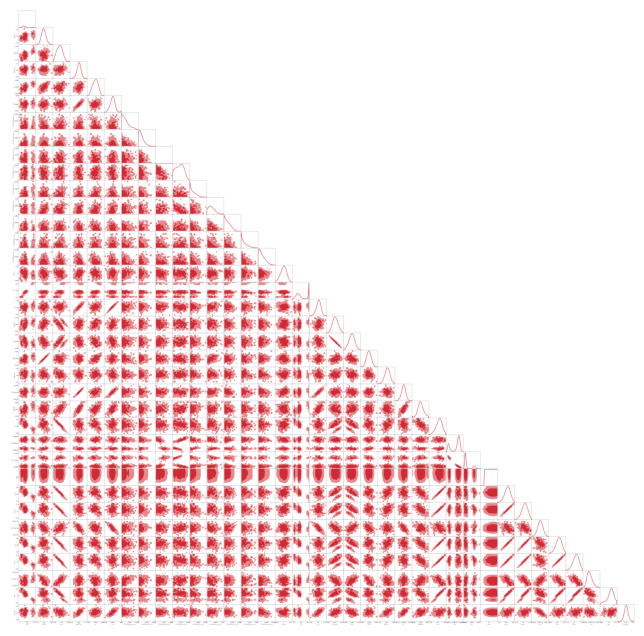

Displaying planck_TTTEEElensing_pantheon_plus_boss_2025-12-19_1d.pdf


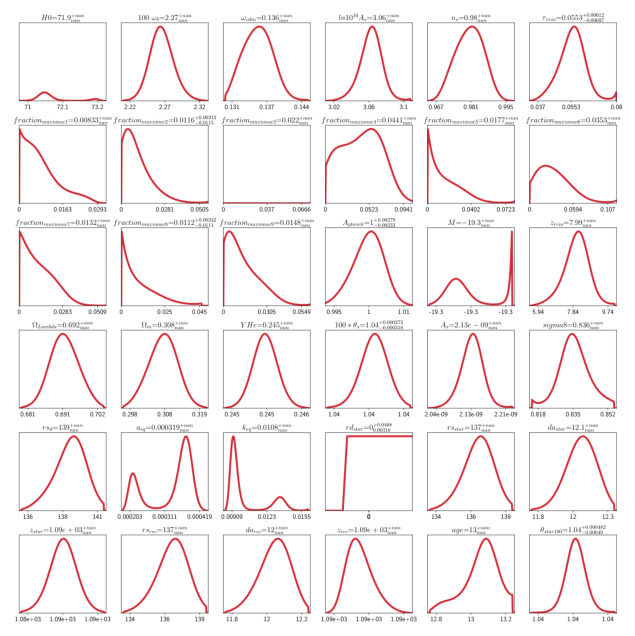

Displaying planck_TTTEEElensing_pantheon_plus_sh0es_boss_2025-12-19_1d.pdf


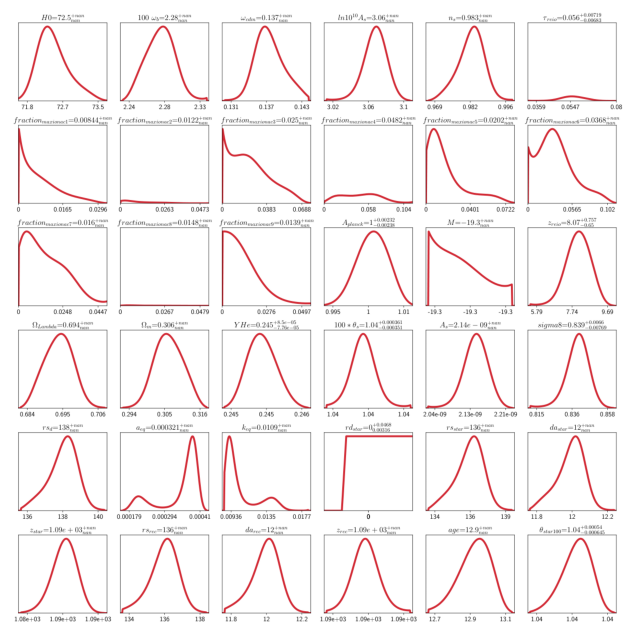

Displaying planck_TTTEEElensing_pantheon_plus_sh0es_boss_2025-12-19_triangle.pdf


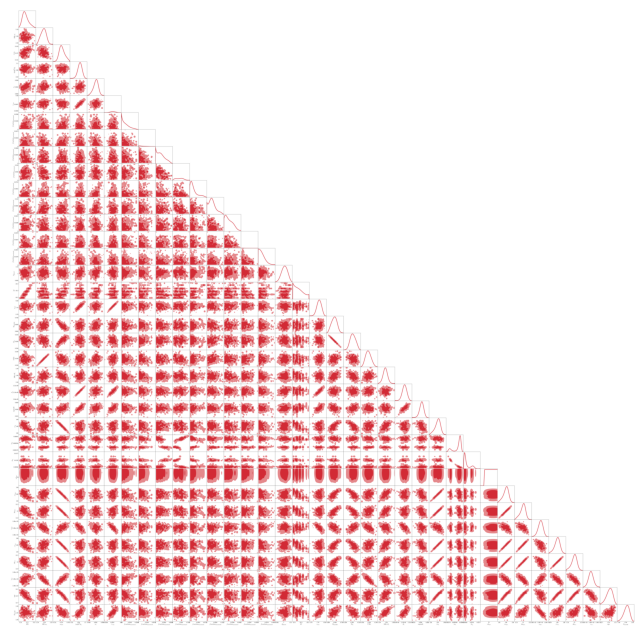

In [5]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

base = Path("/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/9_axions")


chains = [
        "planck_TTTEEElensing_pantheon_plus_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_sh0es_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_desi_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_sh0es_desi_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_boss_2025-12-19",
        "planck_TTTEEElensing_pantheon_plus_sh0es_boss_2025-12-19",
         ]

for chain_name in chains:
    chain_dir = base / chain_name / "plots"
    pdfs = list(chain_dir.glob("*.pdf"))

    if not pdfs:
        print(f"No PDFs found in {chain_dir}")
        continue

    for pdf_path in pdfs:
        print(f"Displaying {pdf_path.name}")
        doc = fitz.open(pdf_path)
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            pix = page.get_pixmap()  # Render page to pixmap
            img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)  # Convert to array

            plt.figure(figsize=(12, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
